# `20210425a` testing muxes

In [28]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import butter, lfilter,hilbert
import json
%load_ext autoreload
%autoreload 2

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
with open("/home/kelu/ultrasound/echomods/matty/20210425a/hvmux_tests/data2.json") as json_file:
    data = json.load(json_file)
data.keys()

dict_keys(['0', '3', '6', '9', '12', '18', '24', '33', '36', '48', '66', '72', '96', '129', '132', '144', '192', '258', '264', '288', '384', '513', '516', '528', '576', '768'])

In [208]:
RAW = {}
for k in data.keys():
    SIG = np.array(data[k]) 
    for i in range(len(SIG)):
        SIG[i] = SIG[i] - np.mean(SIG[i])
    signal = np.empty((len(SIG[0])*2,),
                    dtype=SIG[0].dtype)
    # Compute even and odd datas.
    signal[0::2] = np.sum(SIG[1::2], axis=0)/(16.0)
    signal[1::2] = np.sum(SIG[::2], axis=0)/(16.0)
    RAW[k] = signal

# Checking frequencies

### Checking if interleaving is clean

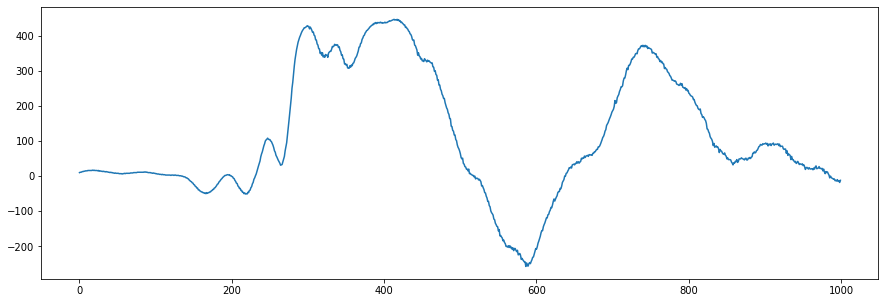

In [209]:
plt.figure(figsize=(15,5))
plt.plot(RAW["3"][1000:2000])

### Check frequencies

Text(0.5, 1.0, 'Raw frequencies')

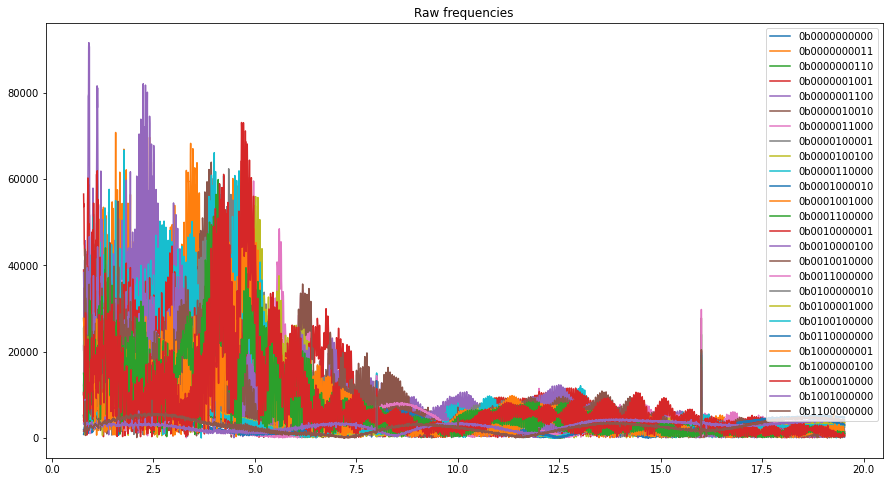

In [225]:
plt.figure(figsize=(15,8))
F = len(cln[j])
f = [x*128.0/F for x in range(F)]
for j in list(data.keys()):
    FFT = np.abs(np.fft.fft(RAW[j]))
    
    plt.plot(f[200:5000],FFT[200:5000],label=str(format(int(j), '#012b') )) 
plt.legend()
plt.title("Raw frequencies")

# Let's have filtered signals, between 1MHz and 8MHz
and interleave data

In [226]:
cln = {}
for k in data.keys():
    SIG = np.array(data[k])
    for i in range(len(SIG)):
        SIG[i] = butter_bandpass_filter(SIG[i], 1, 8, 64, order=6)
    signal = np.empty((len(SIG[0])*2,),
                    dtype=SIG[0].dtype)
    # Compute even and odd datas.
    signal[0::2] = np.sum(SIG[1::2], axis=0)/(16.0)
    signal[1::2] = np.sum(SIG[::2], axis=0)/(16.0)
    cln[k] = signal



In [227]:
t = [x*256.0/len(cln["3"]) for x in range(len(cln["3"]))]
d = [x*1.450/2 for x in t] # distance in mm

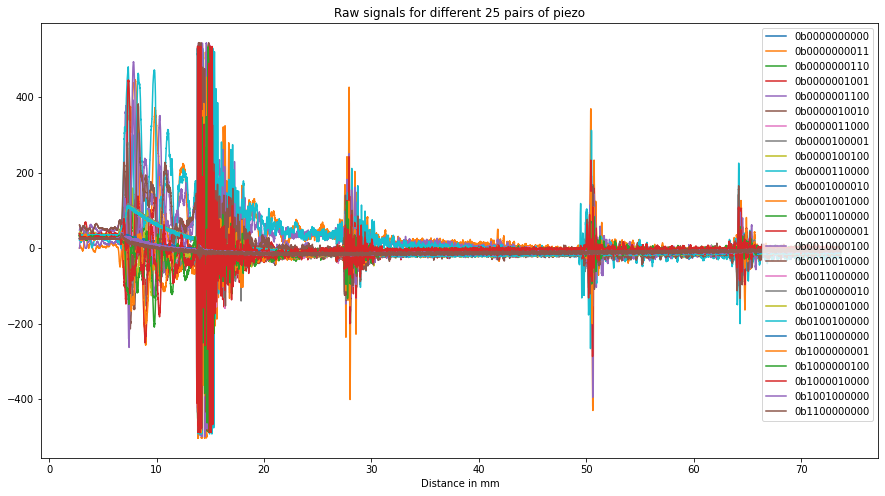

In [228]:
plt.figure(figsize=(15,8))
for j in list(data.keys()):
    plt.plot(d[500:13000],RAW[j][500:13000],label=str(format(int(j), '#012b') )) 
plt.legend()
plt.xlabel("Distance in mm")
plt.title("Raw signals for different 25 pairs of piezo")
plt.savefig("raw_sigs.jpg")

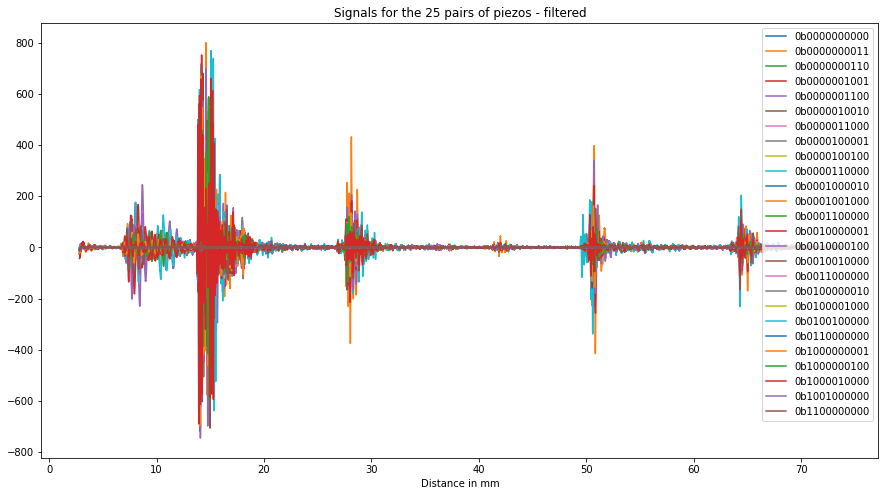

In [229]:
plt.figure(figsize=(15,8))
for j in list(data.keys()):
    plt.plot(d[500:13000],cln[j][500:13000],label=str(format(int(j), '#012b') )) 
plt.legend()
plt.xlabel("Distance in mm")
plt.title("Signals for the 25 pairs of piezos - filtered")
plt.savefig("filtered_sigs.jpg")

# Saving raw data

In [230]:
np.savez("processed.npz",data=cln)
np.savez("raw.npz",data=RAW)
np.load("processed.npz",allow_pickle=True)["data"].item()

{'0': array([ 0,  0, 13, ...,  1,  0,  1]),
 '3': array([ 0,  0, 13, ...,  0,  0,  0]),
 '6': array([ 0,  0, 13, ...,  0,  0,  0]),
 '9': array([ 0,  0, 13, ...,  0,  0,  0]),
 '12': array([ 0,  0, 13, ...,  1,  0,  0]),
 '18': array([ 0,  0, 13, ...,  0,  0,  0]),
 '24': array([ 0,  0, 13, ...,  1,  0,  1]),
 '33': array([ 0,  0, 13, ...,  0,  0,  0]),
 '36': array([ 0,  0, 13, ...,  0, -1,  0]),
 '48': array([ 0,  0, 13, ...,  0,  0,  0]),
 '66': array([ 0,  0, 13, ...,  0,  0,  0]),
 '72': array([ 0,  0, 13, ...,  1, -1,  0]),
 '96': array([ 0,  0, 13, ...,  2,  0,  2]),
 '129': array([ 0,  0, 13, ..., -1,  0,  0]),
 '132': array([ 0,  0, 13, ...,  1,  0,  1]),
 '144': array([ 0,  0, 13, ...,  0,  1,  0]),
 '192': array([ 0,  0, 13, ...,  0,  0,  0]),
 '258': array([ 0,  0, 13, ...,  0,  0,  0]),
 '264': array([ 0,  0, 13, ...,  0,  0,  0]),
 '288': array([ 0,  0, 13, ...,  0,  0,  0]),
 '384': array([ 0,  0, 13, ...,  1,  1,  0]),
 '513': array([ 0,  0, 13, ...,  0,  0,  0]),
 '516

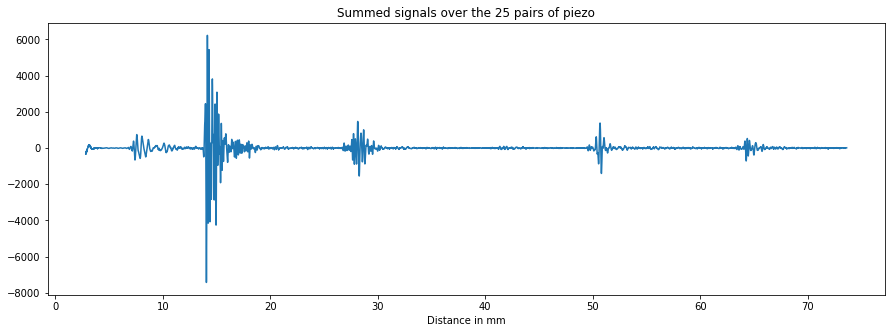

In [236]:
ALL = []
for j in list(data.keys()):
    ALL.append(cln[j])
ALL = np.array(ALL)
plt.figure(figsize=(15,5)) 

plt.plot(d[500:13000],np.sum(ALL,axis=0)[500:13000])
plt.xlabel("Distance in mm")
plt.title("Summed signals over the 25 pairs of piezo")
plt.savefig("summed_filtered_sigs.jpg")
plt.show()

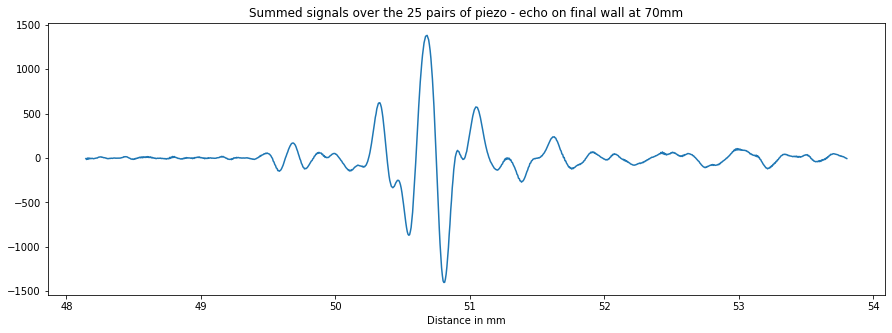

In [235]:
plt.figure(figsize=(15,5))
plt.plot(d[8500:9500],np.sum(ALL,axis=0)[8500:9500])
plt.xlabel("Distance in mm")
plt.title("Summed signals over the 25 pairs of piezo - echo on final wall at 70mm")
plt.savefig("summed_filtered_sigs_details.jpg")

Text(0.5, 1.0, 'Summed signals over the 25 pairs of piezo - echo on final wall at 70mm')

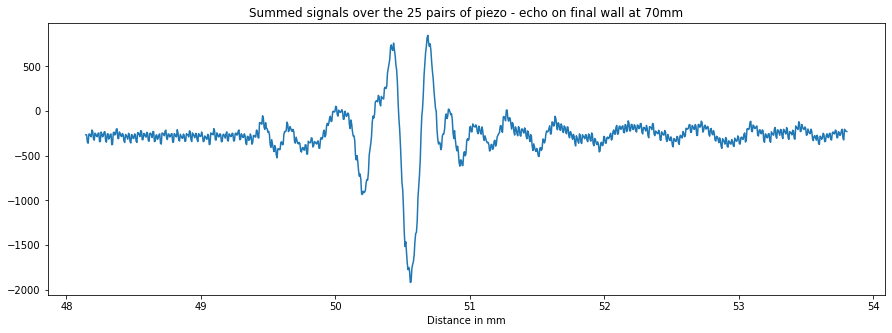

In [234]:
ALLr = []
for j in list(data.keys()):
    ALLr.append(RAW[j])
ALLr = np.array(ALLr)

plt.figure(figsize=(15,5))
plt.plot(d[8500:9500],np.sum(ALLr,axis=0)[8500:9500])
plt.xlabel("Distance in mm")
plt.title("Summed signals over the 25 pairs of piezo - echo on final wall at 70mm")